In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [2]:
import keras
from keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 2000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)


Using TensorFlow backend.


In [4]:
model = keras.models.Sequential()
model.add(layers.Embedding(max_features, 128,
                           input_length=max_len,
                           name='embed'))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
              

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed (Embedding)            (None, 500, 128)          256000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 291,937
Trainable params: 291,937
Non-trainable params: 

In [6]:
callbacks = [
    keras.callbacks.TensorBoard(
        log_dir='tb_log_dir',
        histogram_freq=1,
        embeddings_freq=1,
        embeddings_data = x_train[:100],
    )
]

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=callbacks)



Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 42s 2ms/step - loss: 0.4385 - acc: 0.8107 - val_loss: 0.4369 - val_acc: 0.8292
Epoch 2/20
20000/20000 [==============================] - 41s 2ms/step - loss: 0.4034 - acc: 0.7849 - val_loss: 0.4553 - val_acc: 0.7990
Epoch 3/20
20000/20000 [==============================] - 39s 2ms/step - loss: 0.3339 - acc: 0.7873 - val_loss: 0.5757 - val_acc: 0.6936
Epoch 4/20
20000/20000 [==============================] - 40s 2ms/step - loss: 0.3114 - acc: 0.7242 - val_loss: 0.5811 - val_acc: 0.6528
Epoch 5/20
20000/20000 [==============================] - 41s 2ms/step - loss: 0.2575 - acc: 0.7031 - val_loss: 0.5816 - val_acc: 0.6644
Epoch 6/20
20000/20000 [==============================] - 40s 2ms/step - loss: 0.2280 - acc: 0.6277 - val_loss: 0.7558 - val_acc: 0.5516
Instructions for updating:
Use standard file APIs to delete files with this prefix.
Epoch 7/20
20000/20000 [=====================

In [6]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

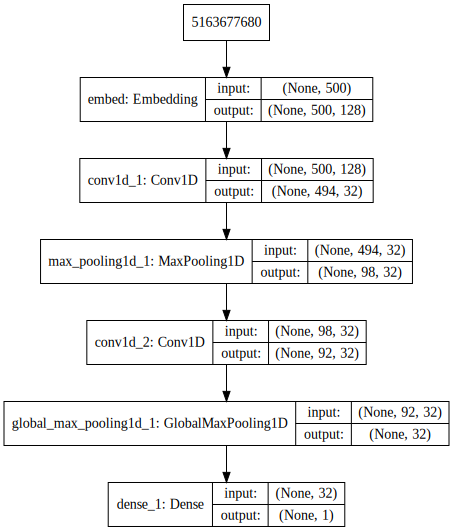

In [9]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))
